<a href="https://colab.research.google.com/github/amarathe/dogs-vs-cats/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

In this lab, you will develop a data augmentation and visualization.

In [0]:

# portions of this lab were taken from Deep Learning with Python

import glob
import os
import random
import shutil

from keras.layers import *
from keras.models import Model
from keras.optimizers import *

import matplotlib.pyplot as plt
%matplotlib inline  

import matplotlib.pyplot as plt

def plothistory(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Using TensorFlow backend.


In [0]:
!rm -rf dogs-vs-cats
!git clone https://github.com/amarathe/dogs-vs-cats.git
!ls


Cloning into 'dogs-vs-cats'...
remote: Enumerating objects: 37402, done.
remote: Total 37402 (delta 0), reused 0 (delta 0), pack-reused 37402
Receiving objects: 100% (37402/37402), 810.11 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (37501/37501), done.
dogs-vs-cats  sample_data


In [0]:
NSAMPLES = 1000

dataset_dir = "dogs-vs-cats"

train_dir = dataset_dir + "/train"

train_dogs = glob.glob(train_dir + "/dog*.*")
train_cats = glob.glob(train_dir + "/cat*.*")

sampled_train_dir = dataset_dir + "/s_train"
sampled_valid_dir = dataset_dir + "/s_valid"
sampled_test_dir = dataset_dir + "/s_test"

try:
    shutil.rmtree(sampled_train_dir)
    shutil.rmtree(sampled_valid_dir)
    shutil.rmtree(sampled_test_dir)
except:
    pass

os.mkdir(sampled_train_dir)
os.mkdir(sampled_valid_dir)
os.mkdir(sampled_test_dir)

os.mkdir(sampled_train_dir + "/dogs")
os.mkdir(sampled_train_dir + "/cats")

os.mkdir(sampled_valid_dir + "/dogs")
os.mkdir(sampled_valid_dir + "/cats")

os.mkdir(sampled_test_dir + "/dogs")
os.mkdir(sampled_test_dir + "/cats")

random.shuffle(train_dogs)
random.shuffle(train_cats)

for fn in train_dogs[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_dogs[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

print("... generated directories s_train, s_valid and s_test")

... generated directories s_train, s_valid and s_test


Now you will create a model to learn now to differentiate between cats and dogs.

In [0]:
#
def get_model():
    x = x_in = Input((150,150,3), name="input")
    x = Conv2D(32, (3,3), padding="valid",  name="fe0")(x)
    x = Activation("relu", name="r0")(x)
    x = MaxPooling2D(2,2,name="mp0")(x)
    x = Conv2D(64, (3,3), padding="valid", name="fe1")(x)
    x = Activation("relu", name="r1")(x)
    x = Flatten(name="fl")(x)
    x = Dense(1, name="d2")(x)
    x = x_int = Activation("sigmoid", name="s1")(x)
    m = Model(inputs=x_in, outputs=x)
    m_int = Model(inputs=x_in, outputs=x_int)
    m.summary()
    return m, m_int


#Simple CNN, 70% accuracy
#def get_model():
#    x = x_in = Input((150,150,3), name="input")
#    x = Conv2D(32, (3,3), padding="valid",  name="fe0")(x)
#    x = Activation("relu", name="r0")(x)
#    x = Flatten(name="fl")(x)
#    x = Dense(1, name="d2")(x)
#    x = x_int = Activation("sigmoid", name="s1")(x)
#    m = Model(inputs=x_in, outputs=x)
#    m_int = Model(inputs=x_in, outputs=x_int)
#    m.summary()
#    return m, m_int

#Simple dense model - 55-60% accuracy
#def get_model():
#  x = x_in = Input((150,150,3), name="input")
#  x = Flatten(name="fl")(x)
#  x_int = Dense(1, name="d2")(x)
#  x = Activation("sigmoid", name="s1")(x_int)
#  m = Model(inputs=x_in, outputs=x)
#  m.summary()
#  m_int = Model(inputs=x_in, outputs=x_int)
#  m_int.summary()
#  return m, m_int

#Original model - doesn't train - 50% accuracy
#def get_model():
#    x = x_in = Input((150,150,3), name="input")
#    x = Conv2D(32, (3,3), padding="valid",  name="fe0")(x)
#    x = Activation("relu", name="r0")(x)
#    x = MaxPooling2D(2,2,name="mp0")(x)
#    x = Conv2D(64, (3,3), padding="valid", name="fe1")(x)
#    x = Activation("relu", name="r1")(x)
#    x = MaxPooling2D(2,2,name="mp1")(x)
#    x = Conv2D(128, (3,3), padding="valid", name="fe2")(x)
#    x = Activation("relu", name="r2")(x)
#    x = MaxPooling2D(2,2,name="mp2")(x)
#    x = Flatten(name="fl")(x)
#    x = Dropout(0.5, name="d5")(x)
#    x = Dense(512, name="d1", activation="relu")(x)
#    x = Dense(1, name="d2")(x)
#    x = Activation("sigmoid", name="s1")(x)
#    m = Model(inputs=x_in, outputs=x)
#    m.summary()
#    return m

adam = Adam(lr=0.0005)

model, model_int = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])
model_int.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])





Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 148, 148, 32)      896       
_________________________________________________________________
r0 (Activation)              (None, 148, 148, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 74, 74, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 72, 72, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 72, 72, 64)        0         
_________________________________________________________________
fl (Flatten)                 (None, 331776)            

 Now you will create an image generator and train this set.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./256)
valid_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In order for you to look at the generator, lets print the shapes of what it generates.

In [0]:
for data_batch, labels_batch in train_generator:
    print("data_batch:", data_batch.shape)
#    print ("data_batch[0]", data_batch[0])
    print("labels_batch:", labels_batch.shape)
#    print ("labels_batch:", labels_batch)
    break

data_batch: (100, 150, 150, 3)
labels_batch: (100,)


In [0]:

#prediction = model.predict(data_batch)
#print ("Prediction before fit:", prediction)

#prediction = model_int.predict(data_batch)
#print ("Before sigmoid:", prediction)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=1,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

#prediction = model.predict(data_batch)
#print ("Prediction:", prediction)

#prediction = model_int.predict(data_batch)
#print ("Before sigmoid:", prediction)







Prediction before fit: [[0.4868966 ]
 [0.52014375]
 [0.4900705 ]
 [0.48432314]
 [0.49871603]
 [0.48433492]
 [0.48068318]
 [0.4779324 ]
 [0.5004922 ]
 [0.48582995]
 [0.5178164 ]
 [0.51470214]
 [0.4727643 ]
 [0.5074413 ]
 [0.49991363]
 [0.4997425 ]
 [0.48342586]
 [0.50962895]
 [0.48940337]
 [0.49572495]
 [0.49751002]
 [0.4971909 ]
 [0.49744833]
 [0.4907983 ]
 [0.5234574 ]
 [0.49058267]
 [0.4874167 ]
 [0.49631286]
 [0.48786482]
 [0.493221  ]
 [0.4924195 ]
 [0.51314586]
 [0.501832  ]
 [0.47777554]
 [0.49850434]
 [0.48745626]
 [0.5121482 ]
 [0.5127446 ]
 [0.49879512]
 [0.48580453]
 [0.50148356]
 [0.5028443 ]
 [0.49908543]
 [0.5123343 ]
 [0.50746185]
 [0.46969995]
 [0.5294369 ]
 [0.49302274]
 [0.54795873]
 [0.47975266]
 [0.50314486]
 [0.4961674 ]
 [0.4897159 ]
 [0.48561224]
 [0.51510906]
 [0.47047785]
 [0.5203989 ]
 [0.49837443]
 [0.4787649 ]
 [0.49857908]
 [0.50947237]
 [0.51793283]
 [0.5123397 ]
 [0.4816669 ]
 [0.48885792]
 [0.50323963]
 [0.5036233 ]
 [0.4717048 ]
 [0.48111182]
 [0.4

Not very good for the effort we did. We can try to use data augmentation by rotating, shifting, fliping, and shearing the image.

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40, # between 0 and 180 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

dogs-vs-cats/train/dog.597.jpg


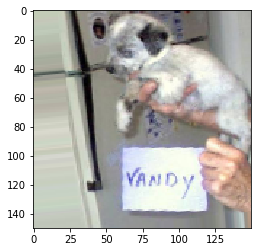

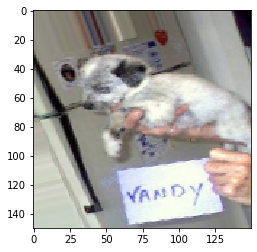

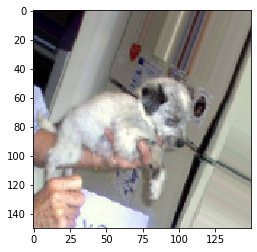

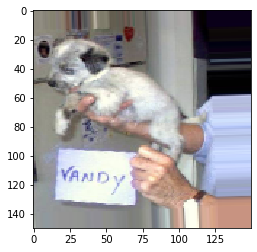

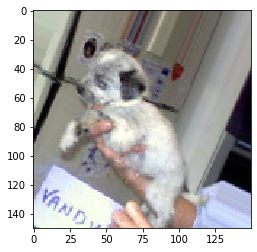

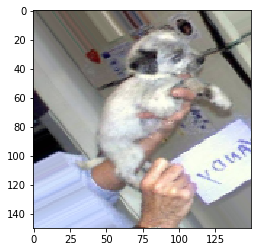

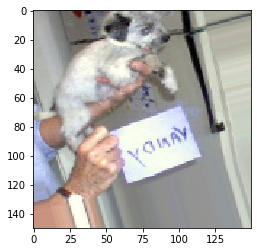

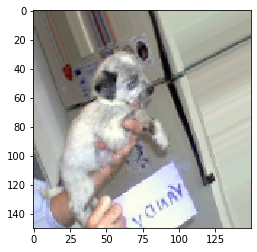

In [0]:
# let's see some of images

from keras.preprocessing import image

fname = train_dogs[0]
print(fname)

img = image.load_img(fname, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

Let's see now if we can get better result.

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

adam = Adam(lr=0.0005)

model, model_int = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#prediction = model.predict(data_batch)
#print ("Prediction with random weights:", prediction)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=1,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 148, 148, 32)      896       
_________________________________________________________________
r0 (Activation)              (None, 148, 148, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 74, 74, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 72, 72, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 72, 72, 64)        0         
_________________________________________

In [0]:
#prediction = model.predict_generator(valid_generator, steps=100)
#prediction = model.predict(data_batch)
#print ("Prediction:", prediction)

You should run both cases and change the number of epochs to 30 or so and report the validation and test accuracy. Try also to modify the network to get higher accuracy.

Running WITHOUT Image generator for 30 epochs - 70% Accuracy

In [0]:
model, model_int = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

train_datagen = ImageDataGenerator(rescale=1./256)
valid_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

#test_generator = test_datagen.flow_from_directory(
#    sampled_test_dir,
#    target_size=(150,150),
#    batch_size=100,
#    class_mode="binary")
#print ("test_generator:", test_generator)

#!ls dogs-vs-cats/s_test/cats

#results = model.evaluate(test_generator)

#print ("Result:", results)
#Test data is not labeled so can't evaluate here

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 148, 148, 32)      896       
_________________________________________________________________
r0 (Activation)              (None, 148, 148, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 74, 74, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 72, 72, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 72, 72, 64)        0         
_________________________________________________________________
fl (Flatten)                 (None, 331776)            0   

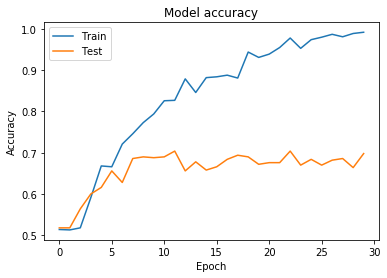

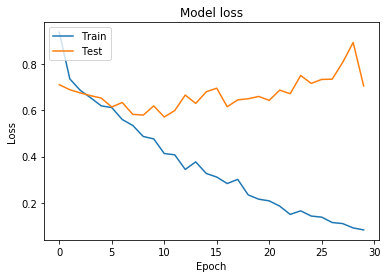

In [0]:
plothistory(history)

Running with Image data generator for 100 epochs - 68% Accuracy

In [0]:
model, model_int = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#train_datagen = ImageDataGenerator(
#    rescale=1./256,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True)

train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")


history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=100,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))


Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 148, 148, 32)      896       
_________________________________________________________________
r0 (Activation)              (None, 148, 148, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 74, 74, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 72, 72, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 72, 72, 64)        0         
_________________________________________________________________
fl (Flatten)                 (None, 331776)            0  

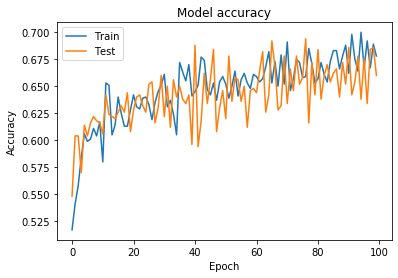

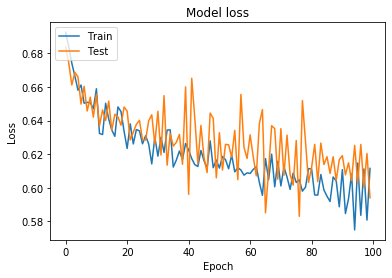

In [0]:
plothistory(history)

# Transfer Learning from VGG16

In the second part of this lab, you will load VGG16 and try to get it to improve the result of this model.

In [0]:
from keras.applications import VGG16

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
vgg16.trainable = False

x_i = Input((150, 150, 3), name="input")
x = vgg16(x_i)
x = Flatten(name="fl")(x)
x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
fl (Flatten)                 (None, 8192)              0         
_________________________________________________________________
d5 (Dropout)                 (None, 8192)              0         
_________________________________________________________________
d1 (Dense)                   (None, 512)               4194816   
_________________________________________________________________
d2 (Dense)                   (None, 1)                 513       
Total par

Note that in this case, we are not retraining the VGG16 model, just the final dense layers. Why?

VGG - 90% Accuracy

In [0]:
adam = Adam(lr=0.001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#validation accuracy 90%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

Epoch 1/30
10/10 [==============================] - 8s 813ms/step - loss: 1.5726 - acc: 0.5380 - val_loss: 0.6874 - val_acc: 0.5320
Epoch 2/30
10/10 [==============================] - 6s 642ms/step - loss: 0.6536 - acc: 0.6000 - val_loss: 0.5511 - val_acc: 0.8160
Epoch 3/30
10/10 [==============================] - 7s 678ms/step - loss: 0.5720 - acc: 0.7160 - val_loss: 0.4550 - val_acc: 0.8160
Epoch 4/30
10/10 [==============================] - 6s 647ms/step - loss: 0.4943 - acc: 0.7460 - val_loss: 0.3464 - val_acc: 0.8540
Epoch 5/30
10/10 [==============================] - 7s 663ms/step - loss: 0.4562 - acc: 0.7760 - val_loss: 0.3388 - val_acc: 0.8420
Epoch 6/30
10/10 [==============================] - 7s 694ms/step - loss: 0.4422 - acc: 0.7830 - val_loss: 0.3179 - val_acc: 0.8620
Epoch 7/30
10/10 [==============================] - 7s 682ms/step - loss: 0.4064 - acc: 0.8240 - val_loss: 0.2966 - val_acc: 0.8820
Epoch 8/30
10/10 [==============================] - 7s 678ms/step - loss: 0.

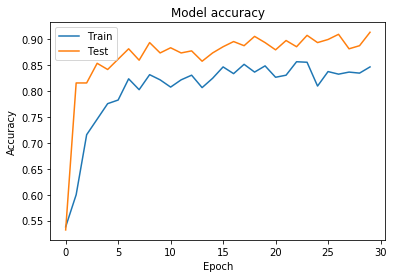

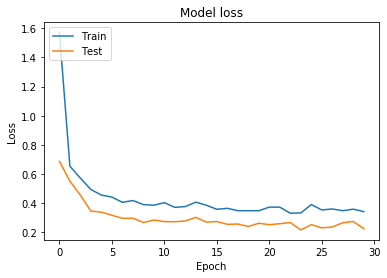

In [0]:
plothistory(history)

Now, you should change the model above so that the vgg16 is only run before, and you should store the features extracted by vgg16 in memory in order to train the last layers of the network.

In Keras, you can set "trainable" attribute for any layer or model. You should traverse vgg16, and try to set the trainable parameter to False before block5, and from block5 forward, it should be set to True.

You should also try to use resnet50 and mobilenetv2.

Report the best results you obtained, and plot the loss and accuracy of your experiments.

# VGG with last layers (block5) trainable: 94% Accuracy

In [0]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
vgg16.summary()

for layer in vgg16.layers[:-4]:
  layer.trainable=False

for layer in vgg16.layers:
  print (layer, layer.trainable)

x_i = Input((150, 150, 3), name="input")
x = vgg16(x_i)
x = Flatten(name="fl")(x)
x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.0001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#Validation accuracy 94%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

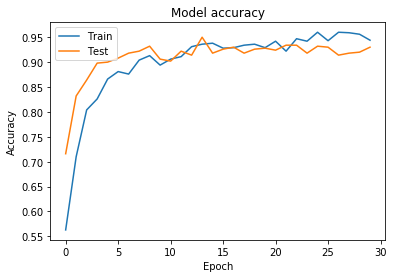

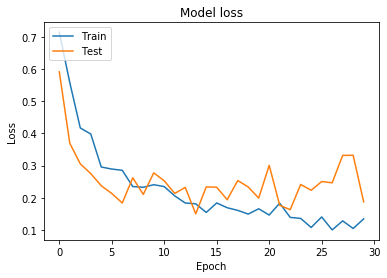

In [0]:
plothistory(history)

# Resnet-50 with dense layers - 95% Accuracy

In [0]:
from keras.applications import resnet
rn50 = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))

rn50.summary()


for layer in rn50.layers:
  #Make only batchnorm layers trainable, as resnet is pre-trained on different data
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable=False

#for layer in rn50.layers:
#  print (layer, layer.trainable)

x_i = Input((150, 150, 3), name="input")
x = rn50(x_i)
#x = rn50.layers[-1].output
x = Flatten(name="fl")(x)
#x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.00001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#Validation accuracy: 95%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))


94773248/94765736 [==============================] - 7s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_________________________

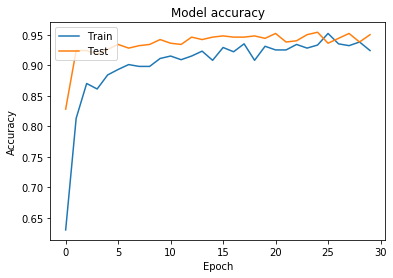

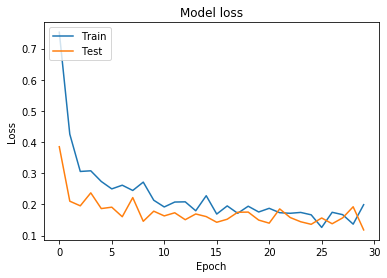

In [0]:
plothistory(history)

# Resnet-50 with last block layers trainable - 95% Accuracy

In [0]:
rn50 = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))

for layer in rn50.layers[:-10]:
  #Make only batchnorm layers trainable, as resnet is pre-trained on different data
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable=False

for layer in rn50.layers:
  print (layer, layer.trainable)

x_i = Input((150, 150, 3), name="input")
x = rn50(x_i)
#x = rn50.layers[-1].output
x = Flatten(name="fl")(x)
#x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.00001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#Validation accuracy: 95%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

<keras.engine.input_layer.InputLayer object at 0x7f9cae611438> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9d90350208> False
<keras.layers.convolutional.Conv2D object at 0x7f9caf00e780> False
<keras.layers.normalization.BatchNormalization object at 0x7f9d904482b0> True
<keras.layers.core.Activation object at 0x7f9cae5fac88> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9cb37ce518> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cb37c4da0> False
<keras.layers.convolutional.Conv2D object at 0x7f9cb3780b00> False
<keras.layers.normalization.BatchNormalization object at 0x7f9cb37b6da0> True
<keras.layers.core.Activation object at 0x7f9cb37b6eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cb3744588> False
<keras.layers.normalization.BatchNormalization object at 0x7f9cb377cba8> True
<keras.layers.core.Activation object at 0x7f9cb37050f0> False
<keras.layers.convolutional.Conv2D object at 0x7f9cb37807f0> False
<keras.layers.convolutional.

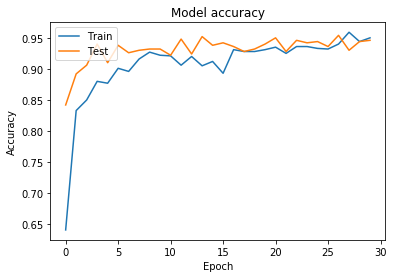

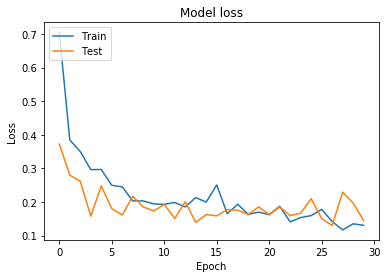

In [0]:
plothistory(history)

# MobileNet2 with dense layers - 94% Accuracy

In [0]:
from keras.applications import mobilenet_v2
mnet2 = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', input_shape=(150,150,3))

mnet2.summary()

for layer in mnet2.layers:
  #Make only batchnorm layers trainable, as resnet is pre-trained on different data
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable=False

for layer in mnet2.layers:
  print (layer, layer.trainable)

x_i = Input((150, 150, 3), name="input")
x = mnet2(x_i)
#x = rn50.layers[-1].output
x = Flatten(name="fl")(x)
#x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.00001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#Validation accuracy: 95%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))



/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
________________

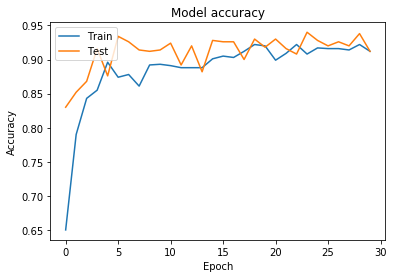

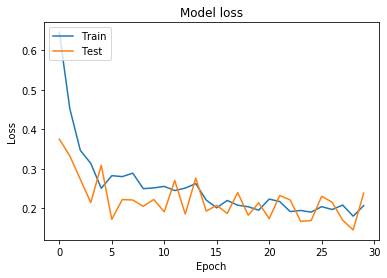

In [0]:
plothistory(history)

# MobileNet2 with last block layers trainable - 94% Accuracy

In [0]:
mnet2 = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', input_shape=(150,150,3))

mnet2.summary()

for layer in mnet2.layers[:-11]:
  #Make only batchnorm layers trainable, as resnet is pre-trained on different data
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable=False

for layer in mnet2.layers:
  print (layer, layer.trainable)

x_i = Input((150, 150, 3), name="input")
x = mnet2(x_i)
#x = rn50.layers[-1].output
x = Flatten(name="fl")(x)
#x = Dropout(0.5, name="d5")(x)
x = Dense(512, name="d1", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.00001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

#Validation accuracy: 94%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))



/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

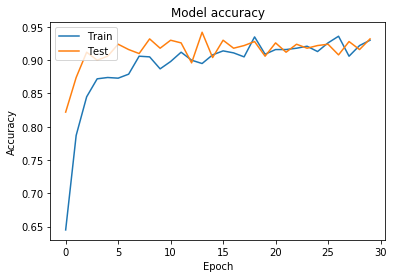

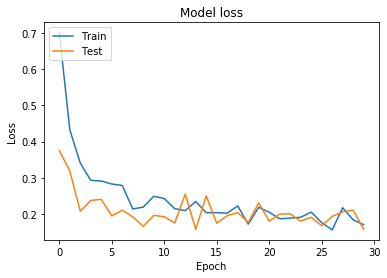

In [0]:
plothistory(history)

# Visualizing What the Network is Learning

In this final part of the lab you will plot what the network is learning.

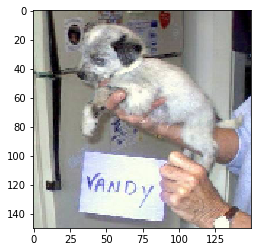

In [0]:
img = image.load_img(fname, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 256.

plt.imshow(x[0])
plt.show()

In [0]:
o = vgg16.predict(x)

In [0]:
o.shape

(1, 4, 4, 512)

(1, 150, 150, 64)


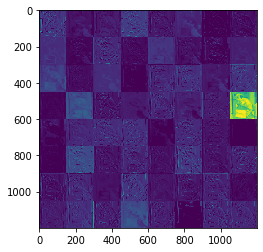

In [0]:
import numpy as np
outputs = [layer.output for layer in vgg16.layers[1:]]

vgg16_to_plot = Model(inputs=vgg16.inputs, outputs=outputs)

o = vgg16_to_plot.predict(x)

print(o[0].shape)

tiled_img = o[0][0,:,:].reshape(150,150,8,8)

full_img = np.transpose(tiled_img, [2,0,3,1]).reshape(150*8, 150*8)

plt.imshow(full_img)
plt.show()

In this exercise, plot the filters on the image _img_.

block5_conv3


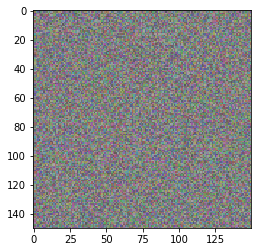

block5_conv2


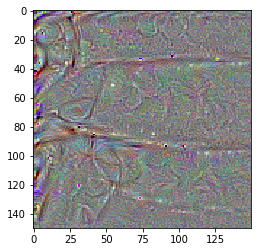

block5_conv1


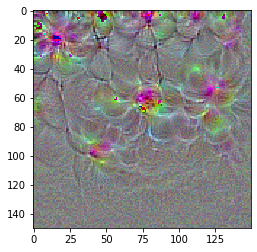

block4_conv3


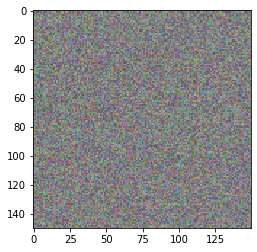

block4_conv2


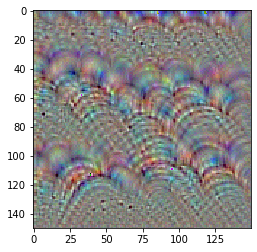

block4_conv1


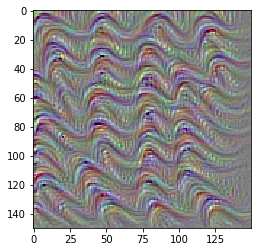

block3_conv3


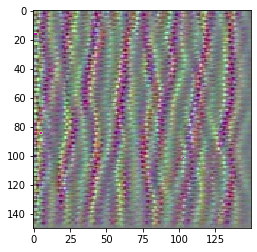

block3_conv2


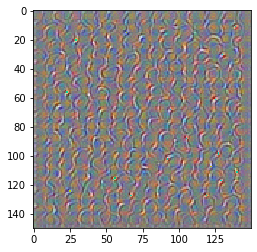

block3_conv1


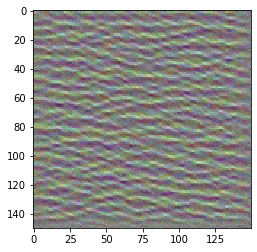

block2_conv2


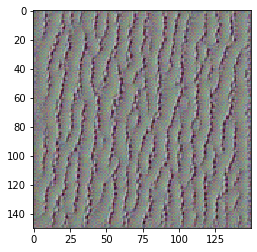

block2_conv1


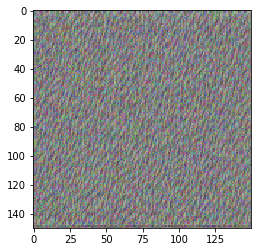

block1_conv2


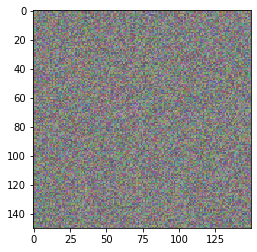

block1_conv1


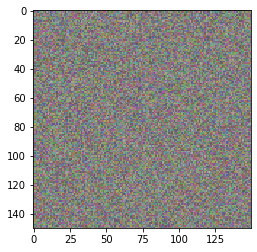

In [0]:
import keras.backend as K

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 256
    x = np.clip(x, 0, 256).astype("uint8")
    
    return x


def plot_weights_for_layer(model, layer_name, filter_index):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.inputs)[0]
    
    grads /= K.sqrt(K.mean(K.square(grads)) + 1e-5)
    
    iterate = K.function(model.inputs, [loss, grads])
    
    loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    
    input_img_data = (np.random.rand(1, 150, 150, 3) * 20 + 128.)
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def plotweight(vgg16, name):
  print (name)
  img = plot_weights_for_layer(vgg16, name, 1)
  plt.imshow(img)
  plt.show()

plotweight(vgg16, "block5_conv3")
plotweight(vgg16, "block5_conv2")
plotweight(vgg16, "block5_conv1")

plotweight(vgg16, "block4_conv3")
plotweight(vgg16, "block4_conv2")
plotweight(vgg16, "block4_conv1")

plotweight(vgg16, "block3_conv3")
plotweight(vgg16, "block3_conv2")
plotweight(vgg16, "block3_conv1")

plotweight(vgg16, "block2_conv2")
plotweight(vgg16, "block2_conv1")

plotweight(vgg16, "block1_conv2")
plotweight(vgg16, "block1_conv1")

Now, try to find some filters that may detect some interesting features like lines.